### 0.0 IMPORTS

In [13]:
import pandas as pd 
import inflection 
import math
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

from IPython.core.display import HTML
from IPython.display import Image


0.1 Helper fuctions

0.2 Loading Data 

In [4]:
df_sales_raw = pd.read_csv('../base_dados/train.csv', low_memory=False)
df_store_raw = pd.read_csv('../base_dados/store.csv', low_memory=False)
# Merge
df_raw = pd.merge(df_sales_raw, df_store_raw, on='Store', how='left')

### 1.0 Data Description

In [5]:
df1 = df_raw.copy()

cols_old = list(df1.columns)

### 1.1 Rename Columns 

In [6]:
snakecase = lambda x: inflection.underscore(x)

cols_rename = list(map(snakecase, cols_old))

df1.columns = cols_rename

### 1.2 Data Dimensions 

In [7]:

print('Number de Rows {} and Number de Columns {}'.format(df1.shape[0], df1.shape[1]))

Number de Rows 1017209 and Number de Columns 18


### 1.3 Data Types

In [8]:
df1['date'] = pd.to_datetime( df1['date'])

df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check NA 

In [9]:
# checking NA values sum and its percentagem from total number of rows
missing_count = df1.isnull().sum() # the count of missing values
value_count = df1.isnull().count() # the count of all values

missing_percentage = round((missing_count/value_count) *100, 2) # the percentage of missing values
missing_df = pd.DataFrame({'missing values count': missing_count, 'percentage': missing_percentage})
missing_df

,missing values count,percentage
store,0,0.00
day_of_week,0,0.00
date,0,0.00
sales,0,0.00
customers,0,0.00
open,0,0.00
promo,0,0.00
state_holiday,0,0.00
school_holiday,0,0.00
store_type,0,0.00


### 1.5 Fillout NA 

In [10]:
## competition_distance
df1['competition_distance'].max()

df1['competition_distance'] = df1['competition_distance'].apply(lambda x:200000.0 if math.isnan(x) else x)

# competition_open_since_month

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)

# # ## competition_open_since_year	

df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)

# # promo2

# #'promo2_since_week' 

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis =1)

# # # promo2_since_year

df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis =1)

# # # promo_interval

month_map = {1: 'Jan', 2: 'Feb' , 3:'Mar', 4: 'Apr', 5:'May' , 6: 'June', 7: 'Jul' , 8: 'Agu', 9: 'Sept' , 10: 'Oct', 11: 'Nov', 12: 'Dec'}

df1['promo_interval'].fillna(0, inplace= True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0  else 1 if (x['month_map'] in x['promo_interval'].split(',')) else 0, axis = 1 )



### 1.6 Change types of data



In [11]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)
df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

### 1.7 Descriptive Statistical  

In [12]:

num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude= ['int64', 'float64', 'datetime64[ns]'])

In [41]:
## Central Tendecy - mean, median 
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

## Dispersion -std, min, max , range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T

d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenate 

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

#m.drop(m.iloc[:, 7:], inplace=True, axis=1)

m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.155173,0.0,0.362069,1.904762,1.628123


In [40]:
num_attributes.agg(['min', 'max', 'ptp', 'mean', 'median', 'std', 'skew', 'kurtosis']).T.reset_index().rename(columns={'index': 'attributes', 'ptp': 'range'})

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908651,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997391,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.926175,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411734,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485759,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.652996,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,is_promo,0.0,1.0,1.0,0.155173,0.0,0.362069,1.904762,1.628123


C:\Users\mathe\AppData\Local\Temp\ipykernel_23088\3985835947.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['competition_open_since_year']),


(<AxesSubplot: xlabel='competition_open_since_year', ylabel='Density'>,)

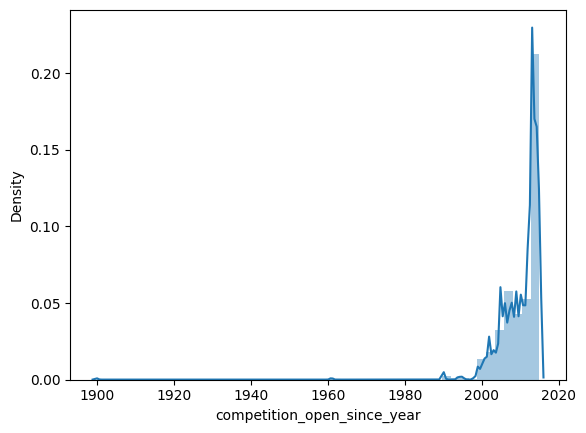

In [14]:
sns.distplot(df1['competition_open_since_year']),

In [15]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
promo_interval                   4
month_map                       12
dtype: int64

### 1.7.2 Categorical Attributes

<AxesSubplot: xlabel='assortment', ylabel='sales'>

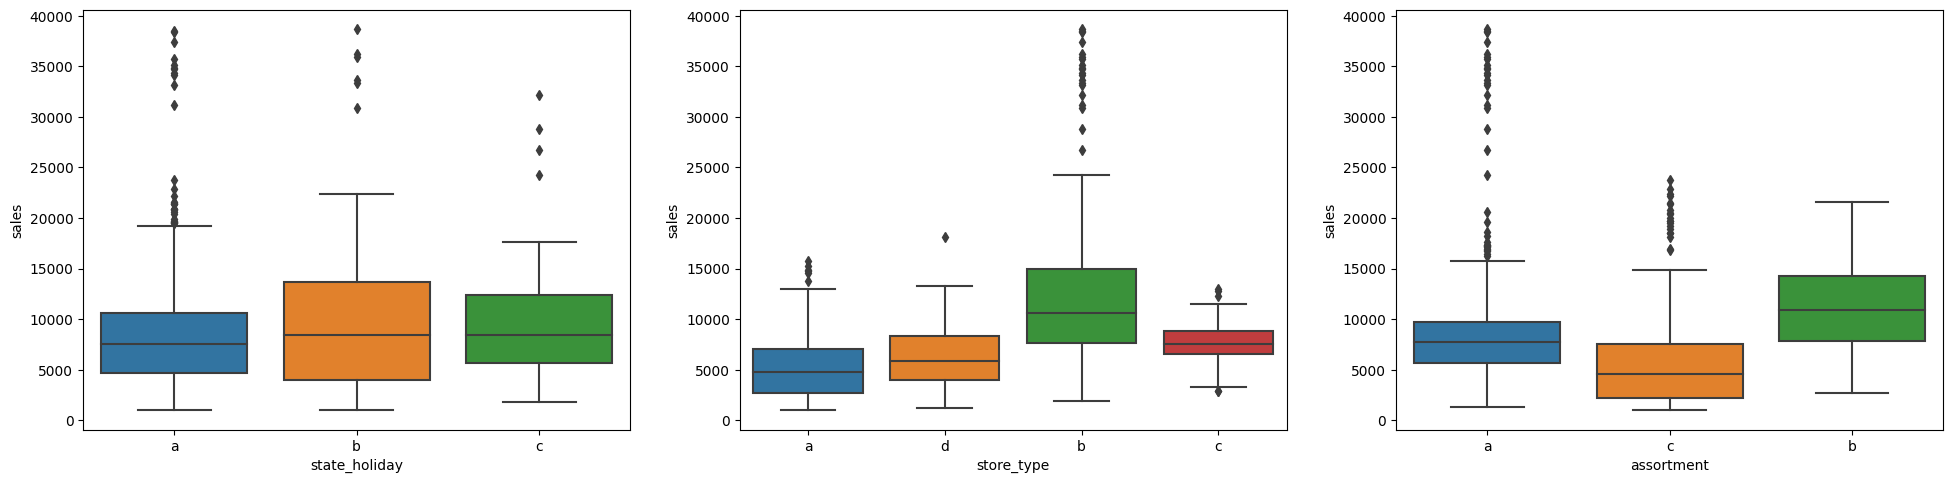

In [32]:
from matplotlib import gridspec
aux1 = df1.loc[((df1['state_holiday'] != '0') & (df1['sales'] > 0 )), :]

fig = plt.figure(figsize=(24, 12))
specs = gridspec.GridSpec( ncols=3, nrows=2, figure=fig )


ax1 = fig.add_subplot( specs[1, 0] ) # First Row First Column
ax2 = fig.add_subplot( specs[1, 1]) # Second Row First Column
ax3 = fig.add_subplot(specs[1,2]) # third row 

# plt.subplot(1,3,1)
# sns.boxplot(x = 'store_type', y= 'sales', data = aux1)

# plt.subplot(1,3,2)
# sns.boxenplot(x = 'store_type', y = 'sales', data = aux1)

# plt.subplot(1,3,3)
# sns.boxplot(x = 'assortment', y ='sales', data = aux1)





sns.boxplot(x = 'state_holiday' , y= 'sales' , data = aux1 , ax = ax1)


sns.boxplot(x = 'store_type' , y= 'sales' , data =  aux1 , ax =  ax2)


sns.boxplot( x = 'assortment', y = 'sales', data = aux1 , ax = ax3)



## 2.0 Passo 02 - FEATURE ENGINEERING

In [14]:
Image('img/mindmapHypothesis.png')

FileNotFoundError: No such file or directory: 'img/mindmapHypothesis.png'

FileNotFoundError: No such file or directory: 'img/mindmapHypothesis.png'

<IPython.core.display.Image object>